In [12]:
import pandas as pd

In [13]:
data=pd.read_csv("Program_2_Dataset.csv")

In [14]:
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming your dataset is named 'data'
# Selecting predictors and target variable
selected_columns = ['Avg_rooms', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres', 'MValue']
data_subset = data[selected_columns].copy()

# Separating predictors and target variable
X = data_subset.drop('MValue', axis=1)
y = data_subset['MValue']

# Calculating VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Displaying VIF values
print(vif_data)


           Variable        VIF
0         Avg_rooms  16.747965
1          Distance   6.880607
2  Property_TaxRate  13.861510
3  Non_Retail_Acres   9.598374


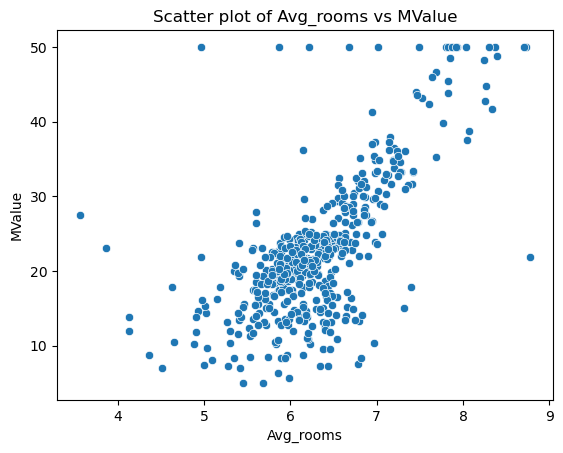

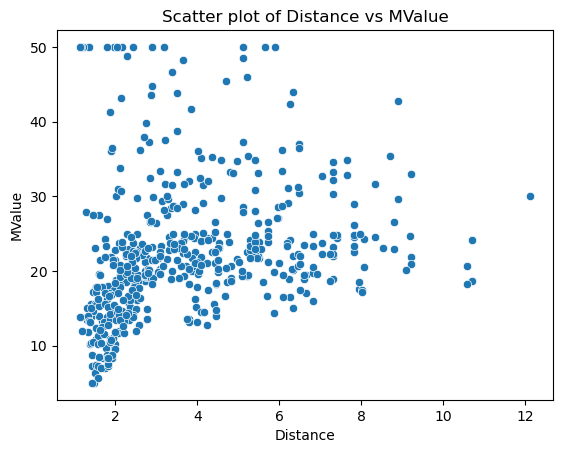

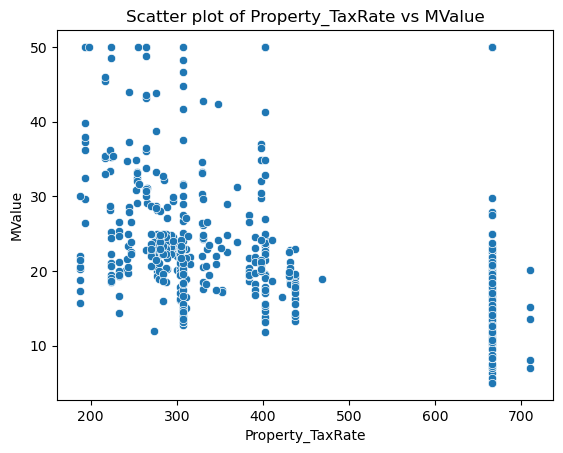

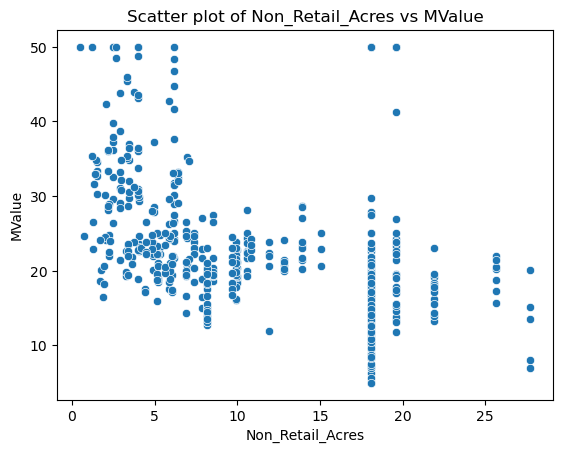

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named 'data'
# Scatter plots for each predictor with the target variable
for predictor in X.columns:
    sns.scatterplot(x=predictor, y='MValue', data=data_subset)
    plt.title(f'Scatter plot of {predictor} vs MValue')
    plt.show()


In [17]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [18]:
from sklearn.linear_model import LinearRegression

# Creating and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
# Coefficients and intercept
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
intercept = model.intercept_

print("Coefficients:")
print(coefficients)
print(f'Intercept: {intercept}')


Coefficients:
           Variable  Coefficient
0         Avg_rooms     7.718233
1          Distance    -0.652917
2  Property_TaxRate    -0.013737
3  Non_Retail_Acres    -0.212582
Intercept: -15.332210810746481


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Predictions on the training set
y_train_pred = model.predict(X_train)

# Predictions on the test set
y_test_pred = model.predict(X_test)

# Mean Squared Error on training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Mean Squared Error on test set
mse_test = mean_squared_error(y_test, y_test_pred)

# R-squared values
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Adjusted R-squared
adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f'Mean Squared Error (Training): {mse_train}')
print(f'Mean Squared Error (Testing): {mse_test}')
print(f'R-squared (Training): {r2_train}')
print(f'R-squared (Testing): {r2_test}')
print(f'Adjusted R-squared (Training): {adj_r2_train}')
print(f'Adjusted R-squared (Testing): {adj_r2_test}')


Mean Squared Error (Training): 40.83615624350906
Mean Squared Error (Testing): 27.5697717975539
R-squared (Training): 0.5523747423715872
R-squared (Testing): 0.6078148171880601
Adjusted R-squared (Training): 0.5470139608431033
Adjusted R-squared (Testing): 0.5981312324272714


VIF: Check the VIF values for each predictor. If VIF is too high for any variable, it indicates multicollinearity, and you may need to reconsider the inclusion of that variable.

Scatter Plots: Visualize the association of each predictor with the target variable. This helps in understanding the relationship and identifying potential outliers.

Model Coefficients: Interpret the coefficients. They represent the change in the target variable for a one-unit change in the corresponding predictor.

Model Evaluation: Analyze the mean squared error, R-squared, and adjusted R-squared values to assess the model's performance on the training and test datasets. Adjusted R-squared considers the number of predictors in the model.

In summary, the VIF helps in selecting predictors without multicollinearity, and the model evaluation metrics provide insights into the model's predictive power and generalization to new data. Adjusted R-squared is especially useful when there are multiple predictors. Adjustments or further analysis may be needed based on these results.